# Basic EDA 
--- 
We will then conduct some data analysis & visualisation on the merged dataset. In summary, below are what we have done: 

1. Overall description of the dataset 

2. Examine the distribution of Label --> Imbalanced data, may consider to perform undersampling 

3. Examine the distribution of numerical data --> minmax standarisation might be needed to avoid latent weight 

4. Examine the distribution of gene_id, transcript_id and transcript position --> Some gene/transcript is actually more active than others. Possible to create a column to rank / indicate their activness? We may suspect that those more actively expressed gene/transcript could have a higher chance of m6A modification 

5. Correlation Analysis --> We will study the correlation between those numerical features, the categorical data (if created activeness as according to point 6, include this as well) and the label. This better tells us if there is any highly correlated features & their importance towards the label  

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Take note that merged_data.csv is not pushed due to large file size. 

In [2]:
merged_data = pd.read_csv('merged_data.csv')

In [7]:
merged_data.head()

,transcript_id,transcript_position,sequence,avg_1-flank_length,avg_1-flank_std,avg_1-flank_mean,avg_central_length,avg_central_std,avg_central_mean,avg_1+flank_length,...,std_1-flank_std,std_1-flank_mean,std_central_length,std_central_std,std_central_mean,std_1+flank_length,std_1+flank_std,std_1+flank_mean,gene_id,label
0,ENST00000000233,244,AAGACCA,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,0.007345,...,1.843025,4.944365,0.005364,3.302671,2.765244,0.004566,2.906225,2.522168,ENSG00000004059,0
1,ENST00000000233,261,CAAACTG,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,0.007710,...,1.689167,2.981182,0.003767,1.237045,3.526528,0.004528,1.466295,2.492530,ENSG00000004059,0
2,ENST00000000233,316,GAAACAG,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,0.007555,...,1.311103,1.492577,0.005035,0.893481,3.203816,0.004497,0.800496,1.484341,ENSG00000004059,0
3,ENST00000000233,332,AGAACAT,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,0.006102,...,2.459317,3.202963,0.004612,1.393868,1.928009,0.003595,0.741771,3.494937,ENSG00000004059,0
4,ENST00000000233,368,AGGACAA,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,0.010019,...,2.743228,2.664643,0.005407,1.753894,2.177236,0.005908,1.341822,2.379045,ENSG00000004059,0


In [4]:
merged_data['transcript_id'] = merged_data['transcript_id'].astype('category')
merged_data['sequence'] = merged_data['sequence'].astype('category')
merged_data['gene_id'] = merged_data['gene_id'].astype('category')


In [5]:
# step 1 
merged_data.describe() 

,transcript_position,avg_1-flank_length,avg_1-flank_std,avg_1-flank_mean,avg_central_length,avg_central_std,avg_central_mean,avg_1+flank_length,avg_1+flank_std,avg_1+flank_mean,...,std_1-flank_length,std_1-flank_std,std_1-flank_mean,std_central_length,std_central_std,std_central_mean,std_1+flank_length,std_1+flank_std,std_1+flank_mean,label
count,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,...,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000
mean,1615.868407,0.008108,4.342127,110.789403,0.008127,5.157547,110.946258,0.007057,2.974051,86.203293,...,0.004887,1.528758,3.336146,0.004831,1.828684,3.194697,0.004001,1.260798,2.448322,0.044937
std,1395.137528,0.001787,1.936267,11.289521,0.001693,2.184069,12.460242,0.001296,0.894199,4.937330,...,0.001505,0.759305,1.459925,0.001403,0.942802,1.000186,0.001170,0.716917,0.727562,0.207166
min,3.000000,0.003616,1.361306,80.370000,0.003803,1.441381,87.071498,0.003537,1.350225,72.231429,...,0.000953,0.218941,0.649221,0.001160,0.227231,0.601585,0.000900,0.175260,0.520369,0.000000
25%,673.000000,0.006799,2.853595,104.596000,0.006904,3.221361,98.816048,0.006151,2.282982,82.050397,...,0.003805,0.928450,2.230443,0.003839,0.956595,2.428203,0.003194,0.688769,1.939124,0.000000
50%,1256.000000,0.007760,3.835318,110.122035,0.007834,4.669024,114.536673,0.006822,2.814199,86.500000,...,0.004662,1.463543,3.056331,0.004645,1.851367,3.094400,0.003829,1.137486,2.356568,0.000000
75%,2139.000000,0.009101,5.420603,119.299837,0.009066,6.963261,121.552632,0.007714,3.494345,89.997368,...,0.005731,2.026709,4.157467,0.005617,2.533590,3.858959,0.004612,1.682102,2.854246,0.000000
max,18730.000000,0.019119,11.644615,136.285714,0.021581,12.128800,137.120000,0.016344,11.898750,105.773134,...,0.018516,33.715770,15.988131,0.020400,30.349842,9.739463,0.015972,30.331393,19.727495,1.000000


As we can see, the range of dataset could be quite difference for length, std and mean. We might consider standardise their mean and std to make them follow a normal distribution. We hthen show the plot of the distribution for each of the numerical column. 

<Axes: xlabel='label'>

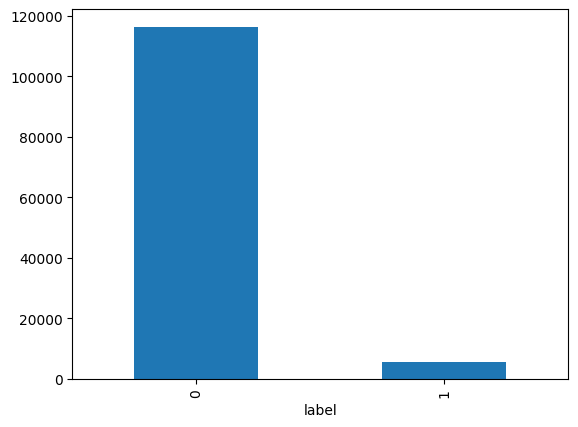

In [6]:
# step 2: View distribution of labels 
merged_data['label'].value_counts().plot(kind='bar')

The data is highly imbalanced. given the large size of the data, we may consider to perform undersampling to truncate the label 0 to handle the imbalanced dataset. 

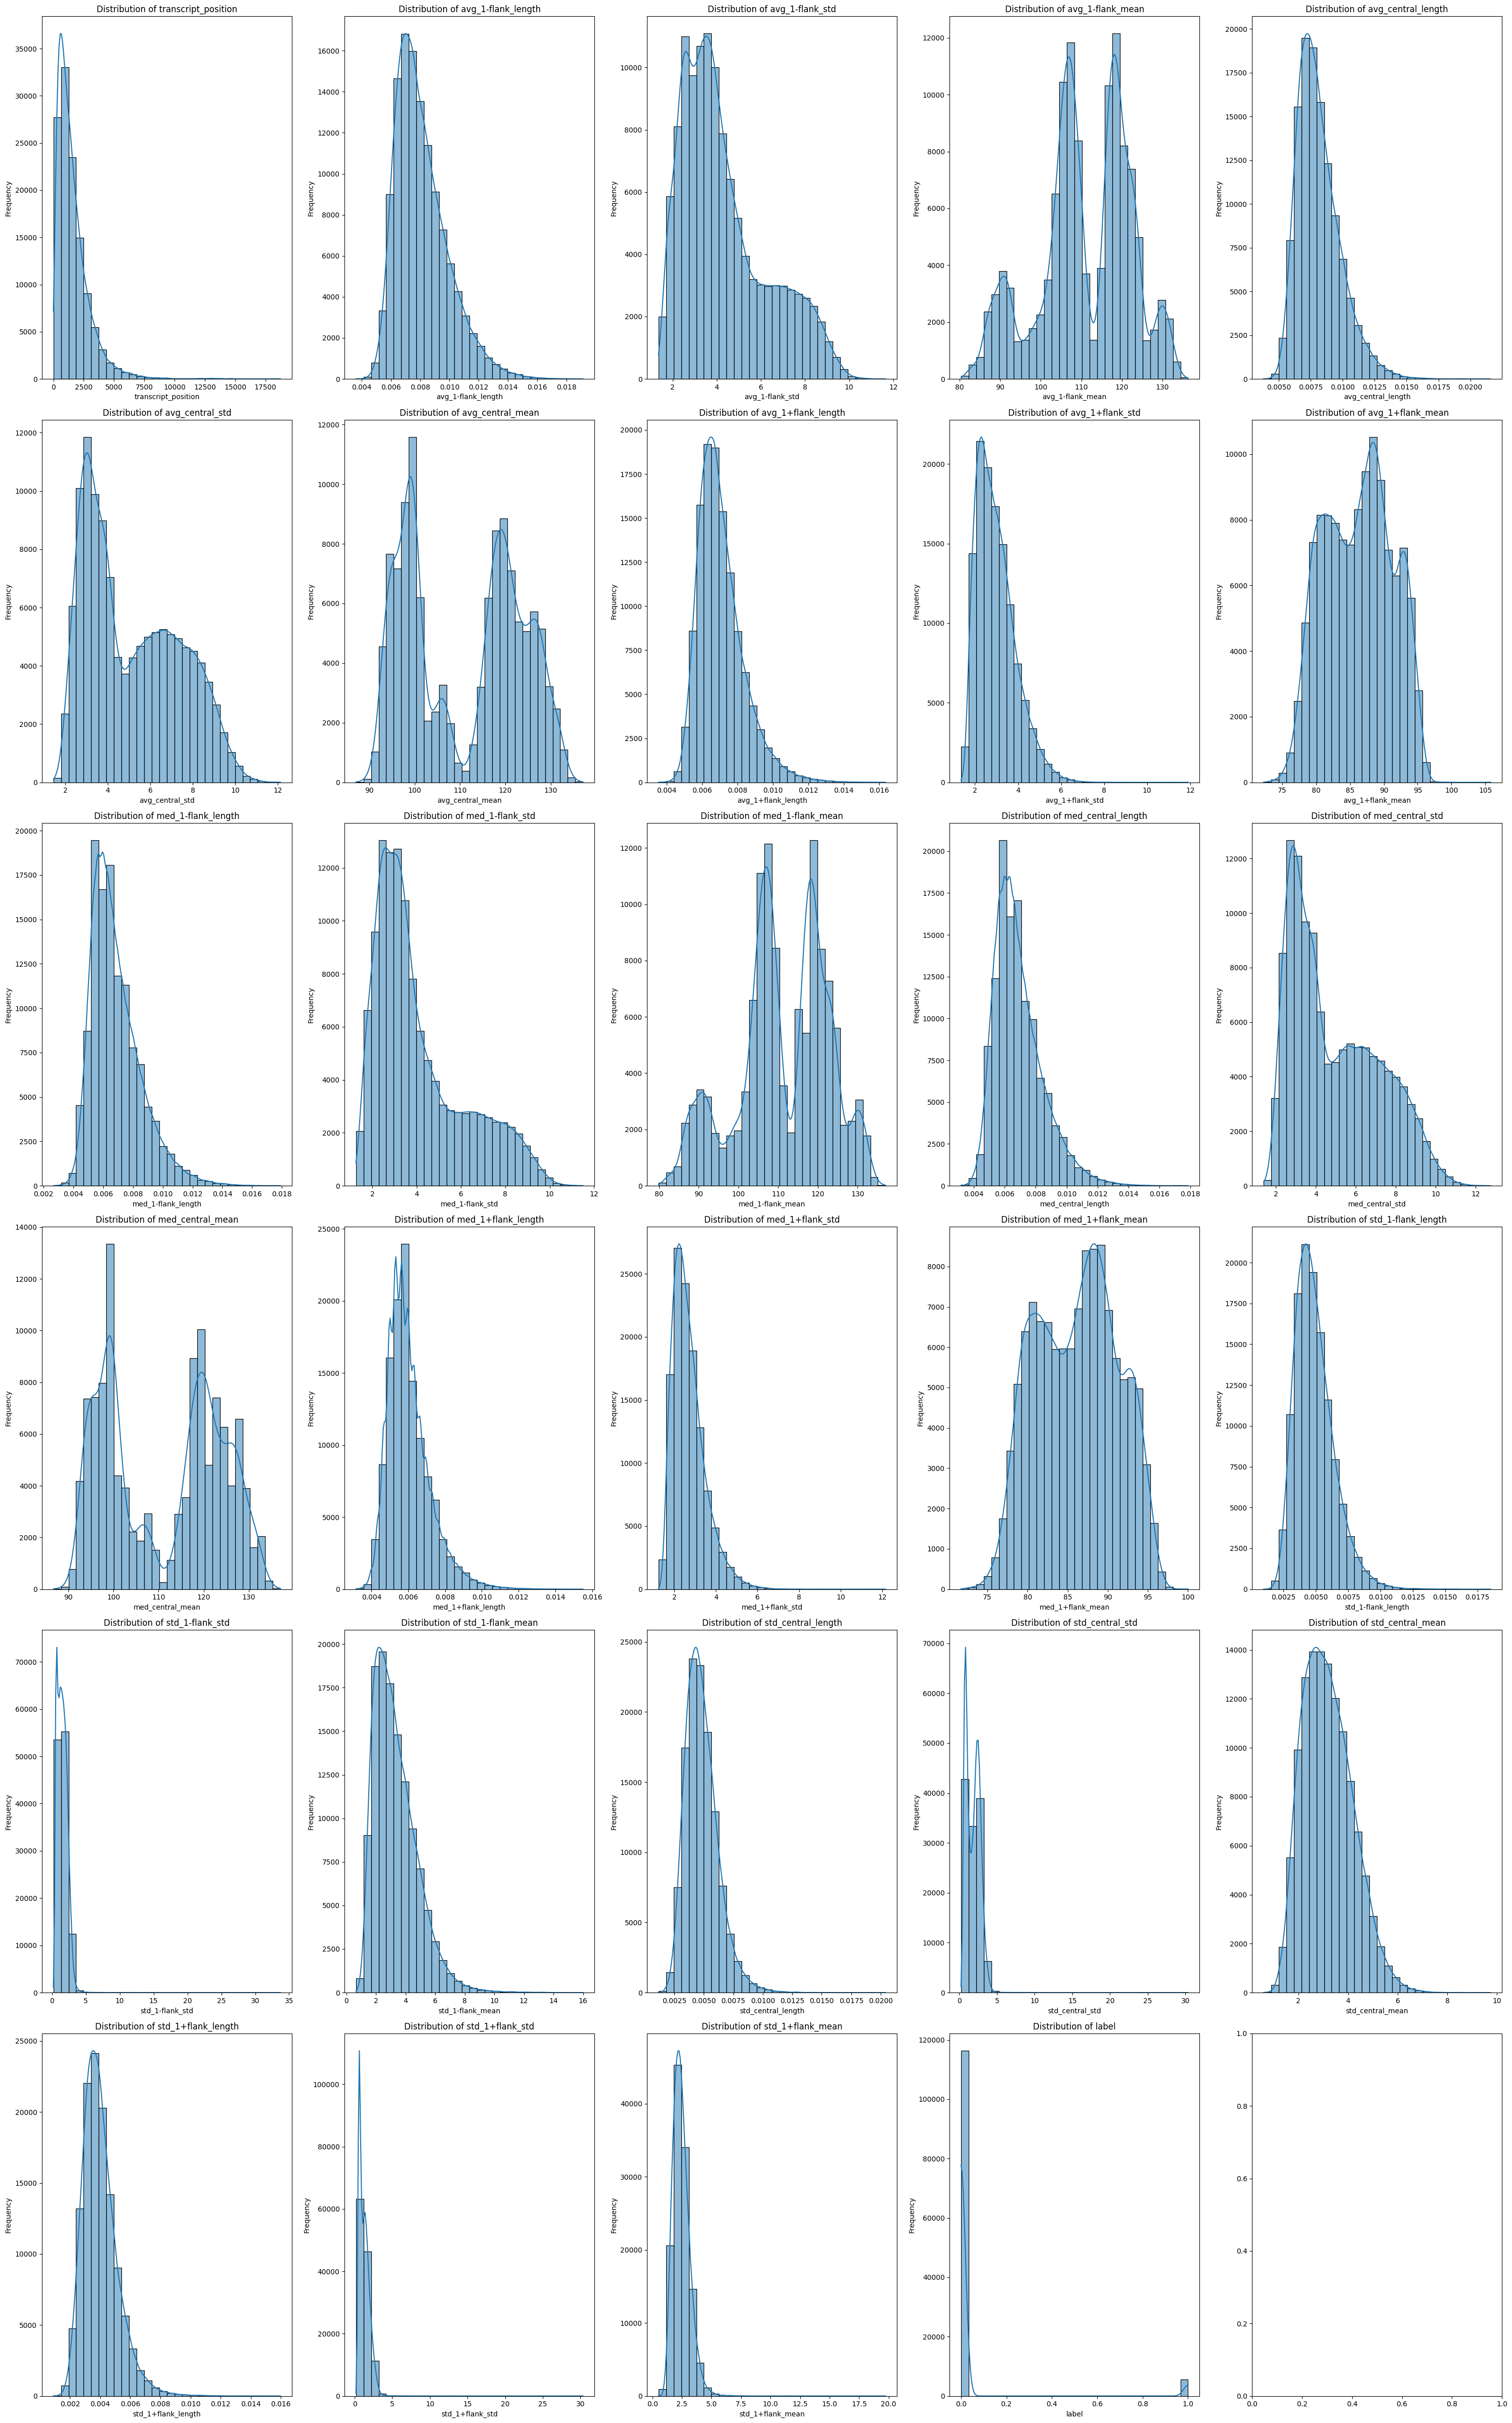

In [10]:
# step 3: distrirbution of numerical 
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the columns you want to plot
to_drop = ['gene_id', 'transcript_id', 'sequence']
columns_to_plot = merged_data.drop(to_drop, axis = 1)
#columns_to_plot = df.columns[3:14]  

# Create subplots for each column
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(30, 48))  

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Loop through each numerical column and create a distribution plot
for i, column in enumerate(columns_to_plot):
    sns.histplot(merged_data[column], ax=axes[i], kde=True, bins=30)  
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    
if len(columns_to_plot) < len(axes):
    for i in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[i])
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


We can see that the data is not normally distributed, and have very different range of value. 

<Axes: >

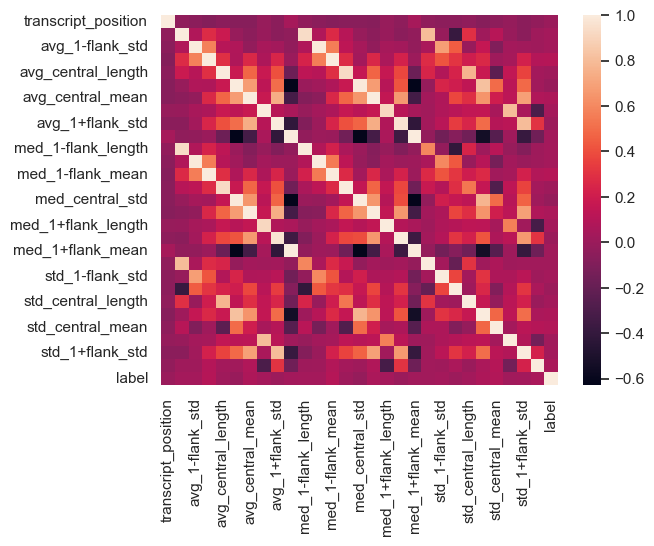

In [11]:
# step 4: correlation 
corrMatrix = columns_to_plot.corr()
sns.set(font_scale = 1)
sns.heatmap(corrMatrix)

One thing we notice is that the column label does not have high correlation with any of the other columns. There is some high correlation among numerical columns themselves, we will use Lasso and RFE to perform feature selection later. 

In [ ]:
# step 5: categorical data 
print(merged_data['gene_id'].value_counts())
print(merged_data['transcript_id'].value_counts())
print(merged_data['transcript_position'].value_counts())
print(merged_data['sequence'].value_counts())

gene_id
ENSG00000128050    274
ENSG00000110321    253
ENSG00000164924    250
ENSG00000141367    230
ENSG00000138434    229
                  ... 
ENSG00000153015      1
ENSG00000147853      1
ENSG00000090432      1
ENSG00000214413      1
ENSG00000106605      1
Name: count, Length: 3852, dtype: int64
transcript_id
ENST00000621829    118
ENST00000269122    108
ENST00000378535    107
ENST00000375643    106
ENST00000216277    104
                  ... 
ENST00000608083      1
ENST00000372945      1
ENST00000370087      1
ENST00000370105      1
ENST00000464220      1
Name: count, Length: 5333, dtype: int64
transcript_position
389     90
565     88
420     87
693     87
597     86
        ..
6675     1
4912     1
5174     1
5436     1
5448     1
Name: count, Length: 7099, dtype: int64
sequence
AAAACAA    1359
AGAACAA     954
AAAACAT     914
AAAACTT     902
AAAACTG     893
           ... 
ATAACCG      49
CGAACTA      46
CTAACCG      45
CGAACCG      39
TAGACCG      39
Name: count, Length: 288, 

In [12]:
print(merged_data['gene_id'].nunique())
print(merged_data['transcript_id'].nunique())
print(merged_data['transcript_position'].nunique())
print(merged_data['sequence'].nunique())

3852
5333
7099
288


Noticed that the categorical data is actually not evenly distributed. We have some gene / transcript / even position that is more commonly seen than others. This indicates that we have some more highly expressed gene/transcript. It is possible, that we create some new categorical labels to indicate whether the gene/transcript is active or not 